<h1><center>CMPE 462 - Project 2<br>Implementing an SVM Classifier<br>Due: May 18, 2020, 23:59</center></h1>

* **Student ID1:2015401183**
* **Student ID2:2015300084**

## Overview

In this project, you are going to implement SVM. For this purpose, a data set (data.mat) is given to you. You can load the mat dataset into Python using the function `loadmat` in `Scipy.io`. When you load the data, you will obtain a dictionary object, where `X` stores the data matrix and `Y` stores the labels. You can use the first 150 samples for training and the rest for testing. In this project, you will use the software package [`LIBSVM`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/) to implement SVM. Note that `LIBSVM` has a [`Python interface`](https://github.com/cjlin1/libsvm/tree/master/python), so you can call the SVM functions in Python. 

In [1]:
#to install svm libraries for windows
#!pip install libsvm
#!pip install svm
#!pip install cvxopt

In [2]:
#svm library for windows 
from libsvm.svmutil import *

In [3]:
#svm library for mac
#from svmutil import *

In [4]:
import scipy.io as sio
import numpy as np
from ctypes import *
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [5]:
data_dict = sio.loadmat('data.mat')
X = data_dict.get('X')
y = data_dict.get('Y')
X_train, y_train = X[:150],y[:150].reshape((150))#training data
X_test, y_test = X[150:], y[150:].reshape((120))#test data

## Task 1 - 30 pts

Train a hard margin linear SVM and report both train and test classification accuracy.

In [6]:
hard_svm = svm_train(y_train, X_train, '-c 10000000000 -t 0')#hard margin linear(-t 0) svm with too high c

In [7]:
hard_svm_train_label, hard_svm_train_acc, hard_svm_train_val = svm_predict(y_train, X_train, hard_svm)#training accuracy

Accuracy = 74.6667% (112/150) (classification)


In [8]:
hard_svm_test_label, hard_svm_test_acc, hard_svm_test_val = svm_predict(y_test, X_test, hard_svm)#test accuracy

Accuracy = 77.5% (93/120) (classification)


## Task 2 - 40 pts

Train soft margin SVM for different values of the parameter $C$, and with different kernel functions. Systematically report your results. For instance, report the performances of different kernels for a fixed $C$, then report the performance for different $C$ values for a fixed kernel, and so on.

In [9]:
#sv_nr = hard_svm.get_nr_sv()
#sv_coef = hard_svm.get_sv_coef()
#sv_array = hard_svm.get_SV()
#sv_indices = hard_svm.get_sv_indices()
#sv_bias_ctype = hard_svm.rho
#sv_bias_array = np.ctypeslib.as_array(sv_bias_ctype,((1,1)))
#sv_bias = sv_bias_array[0][0]

In [10]:
#takes training data, test data,list of c values, and t type
#returns tarining and test accuracies for each c values
def test_C_values(y_train, X_train,y_test, X_test, c_list,t):
    train_acc_array = np.zeros((np.size(c_list)))#test accuracy array
    test_acc_array = np.zeros((np.size(c_list)))#test accuracy array
    for c in range (np.size(c_list)):
        option = '-c ' + str(c_list[c]) + ' -t ' + str(t)#option: c value and kernel type(t)
        soft_svm = svm_train(y_train, X_train, option)#trainig svm model
        print()
        print(option + ' :')
        print('training')
        soft_svm_train_label, soft_svm_train_acc, soft_svm_train_val = svm_predict(y_train, X_train, soft_svm)#prediction of training data
        train_acc_array[c] = soft_svm_train_acc[0]#training accuracy
        
        print('test')
        soft_svm_test_label, soft_svm_test_acc, soft_svm_test_val = svm_predict(y_test, X_test, soft_svm)#prediction of test data
        test_acc_array[c] = soft_svm_test_acc[0]#test accuracy
    return train_acc_array, test_acc_array

In [11]:
#exponential c values
c_list_exp = [0.0001, 0.0003, 0.001,0.003,0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]

In [12]:
t = 0 #linear SVM
train_acc_array_t0_exp, test_acc_array_t0_exp = test_C_values(y_train, X_train, y_test, X_test, c_list_exp,t)


-c 0.0001 -t 0 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.0003 -t 0 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.001 -t 0 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.003 -t 0 :
training
Accuracy = 68.6667% (103/150) (classification)
test
Accuracy = 76.6667% (92/120) (classification)

-c 0.01 -t 0 :
training
Accuracy = 82.6667% (124/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.03 -t 0 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.1 -t 0 :
training
Accuracy = 86% (129/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 0.3 -t 0 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 1 -t 0 :
tra

In [13]:
t = 1#polynomial SVM
train_acc_array_t1_exp, test_acc_array_t1_exp = test_C_values(y_train, X_train,y_test, X_test, c_list_exp,t)


-c 0.0001 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.0003 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.001 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.003 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.01 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.03 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.1 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.3 -t 1 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 1 -t 1 :
train

In [14]:
t = 2#radial basis SVM
train_acc_array_t2_exp, test_acc_array_t2_exp = test_C_values(y_train, X_train,y_test, X_test, c_list_exp,t)


-c 0.0001 -t 2 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.0003 -t 2 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.001 -t 2 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.003 -t 2 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.01 -t 2 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.03 -t 2 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.1 -t 2 :
training
Accuracy = 83.3333% (125/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.3 -t 2 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 1 -t 2 :
tra

In [15]:
t = 3#sigmoid SVM
train_acc_array_t3_exp, test_acc_array_t3_exp = test_C_values(y_train, X_train, y_test, X_test, c_list_exp,t)


-c 0.0001 -t 3 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.0003 -t 3 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.001 -t 3 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.003 -t 3 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.01 -t 3 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.03 -t 3 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 59.1667% (71/120) (classification)

-c 0.1 -t 3 :
training
Accuracy = 82% (123/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.3 -t 3 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 85% (102/120) (classification)

-c 1 -t 3 :
training
Accuracy 

In [16]:
#training accuracies
print('training accuracies:')
print ("%s:\t\t%s\t\t%s\t\t%s\t%s" % ('C values','linear SVM','polynomial SVM', 'radial basis SVM','sigmoid SVM' ))
print ("%s\t\t%s\t\t%s\t\t%s\t\t%s" % ('--------', '-------------', '------------', '------------', '------------'))
for i in range(np.size(c_list_exp)):
       print ("%f\t\t%f\t\t%f\t\t%f\t\t%f" % (c_list_exp[i],train_acc_array_t0_exp[i], train_acc_array_t1_exp[i], train_acc_array_t2_exp[i],train_acc_array_t3_exp[i]))


training accuracies:
C values:		linear SVM		polynomial SVM		radial basis SVM	sigmoid SVM
--------		-------------		------------		------------		------------
0.000100		53.333333		53.333333		53.333333		53.333333
0.000300		53.333333		53.333333		53.333333		53.333333
0.001000		53.333333		53.333333		53.333333		53.333333
0.003000		68.666667		53.333333		53.333333		53.333333
0.010000		82.666667		53.333333		53.333333		53.333333
0.030000		84.666667		53.333333		53.333333		53.333333
0.100000		86.000000		53.333333		83.333333		82.000000
0.300000		85.333333		85.333333		84.666667		84.000000
1.000000		86.666667		86.000000		86.666667		82.666667
3.000000		89.333333		89.333333		90.666667		83.333333
10.000000		88.666667		94.000000		95.333333		78.000000
30.000000		88.666667		96.666667		98.000000		76.000000
100.000000		88.666667		98.666667		99.333333		76.666667
300.000000		90.000000		100.000000		99.333333		75.333333
1000.000000		90.000000		100.000000		100.000000		75.333333
3000.000000		90.000000		100.000000		10

In [17]:
#test accuracies
print('test accuracies:')
print ("%s:\t\t%s\t\t%s\t\t%s\t%s" % ('C values','linear SVM','polynomial SVM', 'radial basis SVM','sigmoid SVM' ))
print ("%s\t\t%s\t\t%s\t\t%s\t\t%s" % ('--------', '-------------', '------------', '------------', '------------'))
for i in range(np.size(c_list_exp)):
       print ("%f\t\t%f\t\t%f\t\t%f\t\t%f" % (c_list_exp[i],test_acc_array_t0_exp[i], test_acc_array_t1_exp[i], test_acc_array_t2_exp[i],test_acc_array_t3_exp[i]))


test accuracies:
C values:		linear SVM		polynomial SVM		radial basis SVM	sigmoid SVM
--------		-------------		------------		------------		------------
0.000100		58.333333		58.333333		58.333333		58.333333
0.000300		58.333333		58.333333		58.333333		58.333333
0.001000		58.333333		58.333333		58.333333		58.333333
0.003000		76.666667		58.333333		58.333333		58.333333
0.010000		84.166667		58.333333		58.333333		58.333333
0.030000		84.166667		58.333333		58.333333		59.166667
0.100000		83.333333		58.333333		84.166667		84.166667
0.300000		83.333333		84.166667		84.166667		85.000000
1.000000		85.000000		82.500000		84.166667		84.166667
3.000000		84.166667		80.833333		83.333333		82.500000
10.000000		81.666667		80.833333		77.500000		80.000000
30.000000		81.666667		81.666667		78.333333		75.000000
100.000000		81.666667		75.000000		78.333333		72.500000
300.000000		81.666667		74.166667		80.000000		74.166667
1000.000000		81.666667		75.833333		76.666667		74.166667
3000.000000		81.666667		75.833333		76.666667	

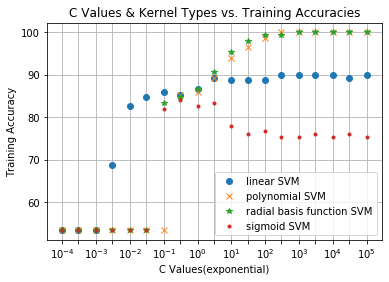

In [18]:
plt.plot(c_list_exp,train_acc_array_t0_exp,'o',c_list_exp,train_acc_array_t1_exp,'x',c_list_exp,train_acc_array_t2_exp,'*',c_list_exp,train_acc_array_t3_exp,'.')
plt.xscale('log')
plt.grid(c_list_exp)
plt.xticks(c_list_exp)
plt.xlabel("C Values(exponential)")
plt.ylabel("Training Accuracy")
plt.title("C Values & Kernel Types vs. Training Accuracies")
plt.legend(["linear SVM","polynomial SVM", "radial basis function SVM","sigmoid SVM"])

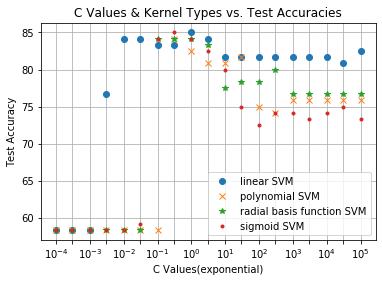

In [19]:
plt.plot(c_list_exp,test_acc_array_t0_exp,'o',c_list_exp,test_acc_array_t1_exp,'x',c_list_exp,test_acc_array_t2_exp,'*',c_list_exp,test_acc_array_t3_exp,'.')
plt.xscale('log')
plt.grid(c_list_exp)
plt.xticks(c_list_exp)
plt.xlabel("C Values(exponential)")
plt.ylabel("Test Accuracy")
plt.title("C Values & Kernel Types vs. Test Accuracies")
plt.legend(["linear SVM","polynomial SVM", "radial basis function SVM","sigmoid SVM"])

In [20]:
#linear c values
c_list_lnr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [21]:
t = 0#linear SVM
train_acc_array_t0_lnr, test_acc_array_t0_lnr = test_C_values(y_train, X_train, y_test, X_test, c_list_lnr,t)


-c 0.1 -t 0 :
training
Accuracy = 86% (129/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 0.2 -t 0 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.3 -t 0 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 0.4 -t 0 :
training
Accuracy = 86% (129/150) (classification)
test
Accuracy = 85% (102/120) (classification)

-c 0.5 -t 0 :
training
Accuracy = 86.6667% (130/150) (classification)
test
Accuracy = 85% (102/120) (classification)

-c 0.6 -t 0 :
training
Accuracy = 88.6667% (133/150) (classification)
test
Accuracy = 85% (102/120) (classification)

-c 0.7 -t 0 :
training
Accuracy = 87.3333% (131/150) (classification)
test
Accuracy = 85% (102/120) (classification)

-c 0.8 -t 0 :
training
Accuracy = 87.3333% (131/150) (classification)
test
Accuracy = 85% (102/120) (classification)

-c 0.9 -t 0 :
training
Accuracy = 87.3333% (131/15

In [22]:
t = 1#polynomial SVM
train_acc_array_t1_lnr, test_acc_array_t1_lnr = test_C_values(y_train, X_train, y_test, X_test, c_list_lnr,t)


-c 0.1 -t 1 :
training
Accuracy = 53.3333% (80/150) (classification)
test
Accuracy = 58.3333% (70/120) (classification)

-c 0.2 -t 1 :
training
Accuracy = 64% (96/150) (classification)
test
Accuracy = 67.5% (81/120) (classification)

-c 0.3 -t 1 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.4 -t 1 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 78.3333% (94/120) (classification)

-c 0.5 -t 1 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 79.1667% (95/120) (classification)

-c 0.6 -t 1 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 79.1667% (95/120) (classification)

-c 0.7 -t 1 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 80.8333% (97/120) (classification)

-c 0.8 -t 1 :
training
Accuracy = 86% (129/150) (classification)
test
Accuracy = 82.5% (99/120) (classification)

-c 0.9 -t 1 :
training
Accuracy = 86% (129/15

In [23]:
t = 2#radial basis function SVM
train_acc_array_t2_lnr, test_acc_array_t2_lnr = test_C_values(y_train, X_train, y_test, X_test, c_list_lnr,t)


-c 0.1 -t 2 :
training
Accuracy = 83.3333% (125/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.2 -t 2 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 0.3 -t 2 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.4 -t 2 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.5 -t 2 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 0.6 -t 2 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 0.7 -t 2 :
training
Accuracy = 85.3333% (128/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.8 -t 2 :
training
Accuracy = 86% (129/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.9 -t 2 :
training
Accurac

In [24]:
t = 3#sigmoid SVM
train_acc_array_t3_lnr, test_acc_array_t3_lnr = test_C_values(y_train, X_train, y_test, X_test, c_list_lnr,t)


-c 0.1 -t 3 :
training
Accuracy = 82% (123/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.2 -t 3 :
training
Accuracy = 83.3333% (125/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.3 -t 3 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 85% (102/120) (classification)

-c 0.4 -t 3 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.5 -t 3 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.6 -t 3 :
training
Accuracy = 84% (126/150) (classification)
test
Accuracy = 84.1667% (101/120) (classification)

-c 0.7 -t 3 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 83.3333% (100/120) (classification)

-c 0.8 -t 3 :
training
Accuracy = 84.6667% (127/150) (classification)
test
Accuracy = 82.5% (99/120) (classification)

-c 0.9 -t 3 :
training
Accuracy = 84% (126/150) (

In [25]:
#training accuracies
print('training accuracies:')
print ("%s:\t\t%s\t\t%s\t\t%s\t%s" % ('C values','linear SVM','polynomial SVM', 'radial basis SVM','sigmoid SVM' ))
print ("%s\t\t%s\t\t%s\t\t%s\t\t%s" % ('--------', '-------------', '------------', '------------', '------------'))
for i in range(np.size(c_list_lnr)):
       print ("%f\t\t%f\t\t%f\t\t%f\t\t%f" % (c_list_lnr[i],train_acc_array_t0_lnr[i], train_acc_array_t1_lnr[i], train_acc_array_t2_lnr[i],train_acc_array_t3_lnr[i]))


training accuracies:
C values:		linear SVM		polynomial SVM		radial basis SVM	sigmoid SVM
--------		-------------		------------		------------		------------
0.100000		86.000000		53.333333		83.333333		82.000000
0.200000		85.333333		64.000000		84.000000		83.333333
0.300000		85.333333		85.333333		84.666667		84.000000
0.400000		86.000000		84.000000		84.000000		84.000000
0.500000		86.666667		84.666667		84.666667		84.000000
0.600000		88.666667		84.666667		85.333333		84.000000
0.700000		87.333333		85.333333		85.333333		84.666667
0.800000		87.333333		86.000000		86.000000		84.666667
0.900000		87.333333		86.000000		86.666667		84.000000
1.000000		86.666667		86.000000		86.666667		82.666667


In [26]:
#test accuracies
print('test accuracies:')
print ("%s:\t\t%s\t\t%s\t\t%s\t%s" % ('C values','linear SVM','polynomial SVM', 'radial basis SVM','sigmoid SVM' ))
print ("%s\t\t%s\t\t%s\t\t%s\t\t%s" % ('--------', '-------------', '------------', '------------', '------------'))
for i in range(np.size(c_list_lnr)):
       print ("%f\t\t%f\t\t%f\t\t%f\t\t%f" % (c_list_lnr[i],test_acc_array_t0_lnr[i], test_acc_array_t1_lnr[i], test_acc_array_t2_lnr[i],test_acc_array_t3_lnr[i]))


test accuracies:
C values:		linear SVM		polynomial SVM		radial basis SVM	sigmoid SVM
--------		-------------		------------		------------		------------
0.100000		83.333333		58.333333		84.166667		84.166667
0.200000		84.166667		67.500000		83.333333		84.166667
0.300000		83.333333		84.166667		84.166667		85.000000
0.400000		85.000000		78.333333		84.166667		84.166667
0.500000		85.000000		79.166667		83.333333		84.166667
0.600000		85.000000		79.166667		83.333333		84.166667
0.700000		85.000000		80.833333		84.166667		83.333333
0.800000		85.000000		82.500000		84.166667		82.500000
0.900000		84.166667		82.500000		84.166667		83.333333
1.000000		85.000000		82.500000		84.166667		84.166667


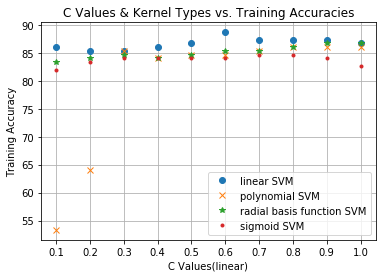

In [27]:
plt.plot(c_list_lnr,train_acc_array_t0_lnr,'o',c_list_lnr,train_acc_array_t1_lnr,'x',c_list_lnr,train_acc_array_t2_lnr,'*',c_list_lnr,train_acc_array_t3_lnr,'.')
plt.grid(c_list_lnr)
plt.xticks(c_list_lnr)
plt.xlabel("C Values(linear)")
plt.ylabel("Training Accuracy")
plt.title("C Values & Kernel Types vs. Training Accuracies")
plt.legend(["linear SVM","polynomial SVM", "radial basis function SVM","sigmoid SVM"])

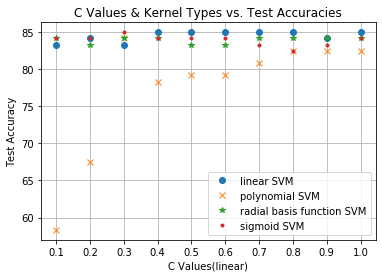

In [28]:
plt.plot(c_list_lnr,test_acc_array_t0_lnr,'o',c_list_lnr,test_acc_array_t1_lnr,'x',c_list_lnr,test_acc_array_t2_lnr,'*',c_list_lnr,test_acc_array_t3_lnr,'.')
plt.grid(c_list_lnr)
plt.xticks(c_list_lnr)
plt.xlabel("C Values(linear)")
plt.ylabel("Test Accuracy")
plt.title("C Values & Kernel Types vs. Test Accuracies")
plt.legend(["linear SVM","polynomial SVM", "radial basis function SVM","sigmoid SVM"])

## Task 3 - 15 pts

Please report how the number of support vectors changes as the value of $C$ increases (while all other parameters remain the same). Discuss whether your observations match the theory.

In [29]:
#takes training data and c values
#returns the number of support vectors for each c value
def get_nr_sv_C_values(y_train, X_train, c_list):
    nr_sv_array = np.zeros((np.size(c_list)))#initial number array
    for c in range (np.size(c_list)):
        option = '-c ' + str(c_list[c]) + ' -t ' + str(0)#option with c value and linear svm
        soft_svm = svm_train(y_train, X_train, option)#training
        nr_sv_array[c] = soft_svm.get_nr_sv()#number of SV
    return nr_sv_array

In [30]:
#numbers of support vectors array
nr_sv_array = get_nr_sv_C_values(y_train, X_train, c_list_exp)

Text(0.5, 1.0, 'C Values vs. number of Support Vector')

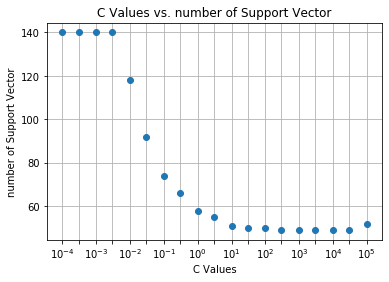

In [31]:
plt.plot(c_list_exp,nr_sv_array,'o')
plt.xscale('log')
plt.grid(c_list_exp)
plt.xticks(c_list_exp)
#plt.yticks(nr_sv_array)
plt.xlabel("C Values")
plt.ylabel("number of Support Vector")
plt.title("C Values vs. number of Support Vector")

## Task 4 - 15 pts

Please investigate the changes in the hyperplane when you remove one of the support vectors, vs., one data point that is not a support vector.

In [32]:
#https://stackoverflow.com/questions/10131385/matlab-libsvm-how-to-find-the-w-coefficients
#takes model, calculates and returns weight vector
def get_weight(svm_model):
    sv_nr = svm_model.get_nr_sv()#number of SV's
    sv_coef = svm_model.get_sv_coef()#coefficients of SV's
    sv_array = svm_model.get_SV()#SV's
    sv_bias_ctype = svm_model.rho#rho value of the model( lp_c_double type)
    sv_bias_array = np.ctypeslib.as_array(sv_bias_ctype,((1,1)))#converts to np array
    sv_bias = -sv_bias_array[0][0]#negative rho value
    d = 14 #feature numbers, features: [1 x1 x2 ... x13]
    weight = np.zeros((d))#1x14 vector: [-rho w1 w2 ... w13]
    weight[0] = sv_bias
    for j in range (1,d):#for each attribute from 1 to 13
        for i in range (np.size(sv_array)):#for each SV
            if j in sv_array[i]:#if sv_array[i][j] is nonzero
                weight[j] = weight[j] + np.array(sv_coef[i])*sv_array[i][j]
    return weight #[-rho w1 w2 ... w13] perpendicular vector to the decision boundary

In [33]:
#takes model, calculates and returns margin
def get_margin(svm_model):
    weight = get_weight(svm_model)
    weight_x = weight[1:] #weight without bias: [w1 w2 ... w13]
    margin = 1/LA.norm(weight_x) #1/two_norm(weight)
    return margin 

In [34]:
svm1 = svm_train(y_train, X_train, '-c 10 -t 0')#initial svm model for 250 vectors and labels
svm1_sv_nr = svm1.get_nr_sv()#numbers of SV's
svm1_sv_indices = svm1.get_sv_indices() - np.ones((1))#at the library,index starts from 1,but it must start from 0

In [35]:
sv_label = np.zeros((np.size(X_train,0)))#SV label, if it's SV, it's 1; otherwise it's 0
for index in svm1_sv_indices:
    sv_label[int(index)] = 1#SV indices
#sv_label

In [36]:
#svm1_sv_indices

In [37]:
w1 = get_weight(svm1)#initial weight
w1

array([ 2.37529588, -1.30726513,  0.52514823,  1.34794553,  1.38300601,
        1.61374734,  0.15936149,  0.13144559, -1.8510571 , -0.0279832 ,
       -0.07509238,  0.07069583,  2.72990177,  0.44450478])

In [38]:
margin1 = get_margin(svm1)
margin1

0.2267520036372602

In [39]:
SV_nr1 = svm1.get_nr_sv()
SV_nr1

51

In [40]:
#this part calculates new weight when one data vector and its label are removed
weight_diff_array= np.zeros((np.size(X_train,0)))#vectors of 2 norm difference between initial weight and new weight
margin_array = np.zeros((np.size(X_train,0)))#vectors of new margins 
SV_nr_array = np.zeros((np.size(X_train,0)))#vectors of new SV numbers
for i in range(np.size(X_train,0)):#for each data vector
    new_X_train = np.delete(X_train, i, 0)#data vector is removed
    new_y_train = np.delete(y_train, i, 0)#data label is removed
    new_svm = svm_train(new_y_train, new_X_train, '-c 10 -t 0')#training with C= 10 and linear SVM 
    new_w = get_weight(new_svm)#new weight
    weight_diff_array[i] = LA.norm(w1-new_w)#2 norm of the difference vector
    margin_array[i] = get_margin(new_svm)#new margin
    SV_nr_array[i] = new_svm.get_nr_sv()

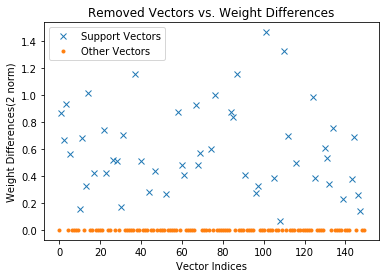

In [41]:
index = np.arange(150)
plt.plot(index[sv_label==1], weight_diff_array[sv_label==1],'x')#support vectors
plt.plot(index[sv_label==0], weight_diff_array[sv_label==0],'.')#other vectors
plt.xlabel("Vector Indices")
plt.ylabel("Weight Differences(2 norm)")
plt.title("Removed Vectors vs. Weight Differences")
plt.legend(["Support Vectors", "Other Vectors"])

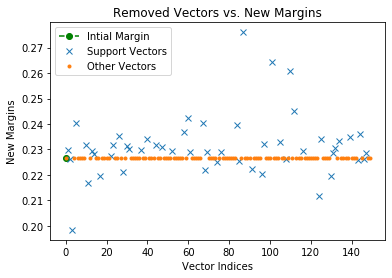

In [42]:
index = np.arange(150)
plt.plot(0,margin1,'go--')#for initial margin
plt.plot(index[sv_label==1],margin_array[sv_label==1],'x')#for removed support vectors
plt.plot(index[sv_label==0],margin_array[sv_label==0],'.')#for other removed vectors
plt.xlabel("Vector Indices")
plt.ylabel("New Margins")
plt.title("Removed Vectors vs. New Margins")
plt.legend(["Intial Margin","Support Vectors", "Other Vectors"])

In [43]:
print("index\t\t\tis_SV\t\t    new margin\t\t\t\tnrsv")
print("-----------------------------------------------------------------------------------------------")
i=0
print ("%s:\t%s\t\t%s\t\t\t%s" % ("initial SVM model","--",margin1,SV_nr1))
while i<150:
    print ("%s:\t\t\t%s\t\t%s\t\t\t%s" % (index[i],sv_label[i],margin_array[i],SV_nr_array[i]))
    i=i+1
print("-----------------------------------------------------------------------------------------------")

index			is_SV		    new margin				nrsv
-----------------------------------------------------------------------------------------------
initial SVM model:	--		0.2267520036372602			51
0:			0.0		0.22675200363726242			51.0
1:			1.0		0.22995883868578684			52.0
2:			1.0		0.22615660854433334			49.0
3:			1.0		0.1984020320601496			46.0
4:			0.0		0.22675200363726475			51.0
5:			1.0		0.24047346548135243			52.0
6:			0.0		0.22675200363726553			51.0
7:			0.0		0.22675200363726553			51.0
8:			0.0		0.22675200363726242			51.0
9:			0.0		0.22675200363726242			51.0
10:			1.0		0.23167168583992875			50.0
11:			1.0		0.2168246383808884			52.0
12:			0.0		0.22676068604907124			51.0
13:			1.0		0.2292597226330255			53.0
14:			1.0		0.2281056295789058			49.0
15:			0.0		0.22675200363726905			51.0
16:			0.0		0.22675200363726242			51.0
17:			1.0		0.2196975446895216			51.0
18:			0.0		0.22675200363726544			51.0
19:			0.0		0.2267524722210818			51.0
20:			0.0		0.22675200363726242			51.0
21:			0.0		0.22675724559521165			51.0

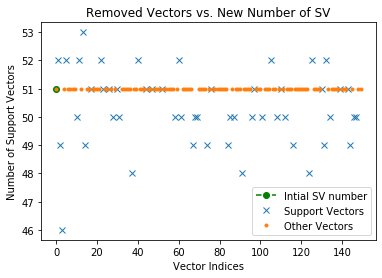

In [44]:
index = np.arange(150)
plt.plot(0,SV_nr1,'go--')#for initial number of SV
plt.plot(index[sv_label==1], SV_nr_array[sv_label==1],'x')#support vectors
plt.plot(index[sv_label==0], SV_nr_array[sv_label==0],'.')#other vectors
plt.xlabel("Vector Indices")
plt.ylabel("Number of Support Vectors")
plt.title("Removed Vectors vs. New Number of SV")
plt.legend(["Intial SV number","Support Vectors", "Other Vectors"])

### Bonus Task - 10 pts

Use Python and [CVXOPT](http://cvxopt.org) QP solver to implement the hard margin SVM. 

In [45]:
#our toy dataset in slides
x=np.array([[0,0],[2,2],[2, 0],[3, 0]])
y=np.array([-1,-1,1,1])
y=y.reshape((4,1))
x

array([[0, 0],
       [2, 2],
       [2, 0],
       [3, 0]])

In [46]:
y

array([[-1],
       [-1],
       [ 1],
       [ 1]])

$
Q= \begin{bmatrix} 
    0 & 0 & \dots & 0 \\
    0 & 1 & &\vdots  \\
    \vdots & &\ddots &0 \\
    0 &  \dots  &  0   &1
    \end{bmatrix}_{(d+1)x(d+1)}
\quad
p= \begin{bmatrix} 
    0\\
    0 \\
    \vdots \\
    0
    \end{bmatrix}_{(d+1)}
\quad
A = \begin{bmatrix} 
    -y_1 & -y_1x_1^T \\
    -y_2 & -y_2x_2^T \\
    \vdots & \vdots \\
    -y_N & -y_Nx_N^T
    \end{bmatrix} _{Nx(d+1)} 
\quad
c = \begin{bmatrix} 
    -1 \\
    -1 \\
    \vdots \\
    -1
    \end{bmatrix}_{N}
$

In [47]:
#primal solution for hard margin svm
from cvxopt import matrix, solvers

def solver(x,y):
    
    N=x.shape[0]
    d=x.shape[1]
    Q=matrix(np.identity(d+1))#Constructing relevant matrices
    p=matrix(np.zeros((d+1,1)))
    A=matrix(np.zeros((N,d+1)))
    c=-matrix(np.ones((N,1)))
    Q[0,0]=0
    for i in range(N):
        A[i,0]=-y[i] #A matrix is constructed with relevant transformation
    for i in range(N):
        for j in range(d):
            A[i,j+1]=-x[i,j]*y[i]
    u=solvers.qp(Q,p,A,c)
    b=u["x"][0]
    w=np.zeros((d,1))
    for j in range(d):
        w[j]=u["x"][j+1]
    return b, w
def predict(x,b,w):
    return np.sign(np.dot(x,w)+b)

In [48]:
x=np.array([[0,0],[2,2],[2, 0],[3, 0]])
y=np.array([-1,-1,1,1])
y=y.reshape((4,1))

In [49]:
b,w=solver(x,y)#solving the SVM
margin = 1/LA.norm(w)#margin

     pcost       dcost       gap    pres   dres
 0:  3.2653e-01  1.9592e+00  6e+00  2e+00  4e+00
 1:  1.5796e+00  8.5663e-01  7e-01  0e+00  2e-15
 2:  1.0195e+00  9.9227e-01  3e-02  1e-16  1e-15
 3:  1.0002e+00  9.9992e-01  3e-04  2e-16  2e-15
 4:  1.0000e+00  1.0000e+00  3e-06  3e-16  7e-16
 5:  1.0000e+00  1.0000e+00  3e-08  4e-16  7e-16
Optimal solution found.


In [50]:
b #bias

-1.0000000134075104

In [51]:
w #weight: w1, w2

array([[ 1.00000001],
       [-1.00000001]])

In [52]:
margin

0.7071067742201198

In [53]:
estimated_y = np.reshape(predict(x,b,w),(4))
desired_y = np.reshape(y,(4))
estimated_y

array([-1., -1.,  1.,  1.])

In [54]:
x_1 = x[:,0]
x_2 = x[:,1]

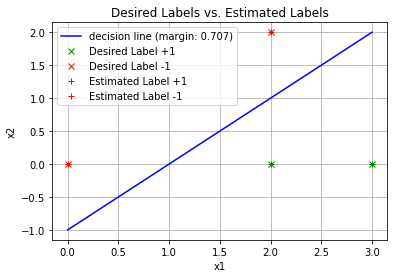

In [55]:
pointa = [x_1.min(),(-w[0]/w[1])*(x_1.min())-(b/w[1])]
pointb = [x_1.max(),(-w[0]/w[1])*(x_1.max())-(b/w[1])]
x_values2 = [pointa[0], pointb[0]]
y_values2 = [pointa[1], pointb[1]]

plt.plot(x_values2, y_values2,color="blue")
plt.plot(x_1[desired_y==1],x_2[desired_y==1],'gx')
plt.plot(x_1[desired_y==-1],x_2[desired_y==-1],'rx')
plt.plot(x_1[estimated_y==1],x_2[estimated_y==1],'g+')
plt.plot(x_1[estimated_y==-1],x_2[estimated_y==-1],'r+')
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Desired Labels vs. Estimated Labels")
plt.legend(["decision line (margin: " + np.str(np.around(margin, decimals = 3))+")","Desired Label +1","Desired Label -1", "Estimated Label +1", "Estimated Label -1" ])